In [3]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from keras.optimizers import SGD
from IPython.display import display, Image

In [5]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

DATA DESCRIPTION

In [6]:
file_path = 'https://raw.githubusercontent.com/datzxje/ML_Project/main/data/saved/merged_data.csv'
df = pd.read_csv(file_path)
df.head(2)

,Date,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2024-05-17,2381.4,2427.4,2377.8,2417.4,5.050,80.06,104.44,1.0870,505.33,16685.97,87.39,1090.0,2095.72,31.259,5303.27,11.99
1,2024-05-16,2391.5,2402.7,2375.2,2385.5,4.877,79.23,104.46,1.0865,497.51,16698.32,85.22,1071.3,2096.25,29.876,5297.10,12.42


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3720 non-null   object 
 1   gold_open   3720 non-null   float64
 2   gold_high   3720 non-null   float64
 3   gold_low    3720 non-null   float64
 4   gold_close  3720 non-null   float64
 5   copper      3720 non-null   float64
 6   crude_oil   3720 non-null   float64
 7   DXY         3720 non-null   float64
 8   EURUSD      3720 non-null   float64
 9   MSCI        3720 non-null   float64
 10  NASDAQ      3720 non-null   float64
 11  NLR         3720 non-null   float64
 12  platinum    3720 non-null   float64
 13  RUT         3720 non-null   float64
 14  silver      3720 non-null   float64
 15  SP500       3720 non-null   float64
 16  VIX         3720 non-null   float64
dtypes: float64(16), object(1)
memory usage: 494.2+ KB


In [8]:
df.describe().drop(['25%', '50%', '75%']).transpose()

,count,mean,std,min,max
gold_open,3720.0,1506.819207,293.260044,1051.5000,2391.5000
gold_high,3720.0,1517.430511,295.670367,1062.7000,2448.8000
gold_low,3720.0,1495.507513,290.817123,1044.5000,2377.8000
gold_close,3720.0,1506.650255,293.249431,1049.6000,2417.4000
copper,3720.0,3.279966,0.672051,1.9435,5.0500
crude_oil,3720.0,71.931489,21.741839,-37.6300,123.7000
DXY,3720.0,91.714409,9.240168,72.9300,114.1100
EURUSD,3720.0,1.194330,0.114250,0.9592,1.4828
MSCI,3720.0,200.305366,194.425939,25.5900,675.1500
NASDAQ,3720.0,7192.250793,4166.916278,2091.7900,16742.3900


In [9]:
#Check missing value
df.isnull().sum()

Date          0
gold_open     0
gold_high     0
gold_low      0
gold_close    0
copper        0
crude_oil     0
DXY           0
EURUSD        0
MSCI          0
NASDAQ        0
NLR           0
platinum      0
RUT           0
silver        0
SP500         0
VIX           0
dtype: int64

In [10]:
##Converting Date column as DateTime format
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [11]:
df.dtypes

Date          datetime64[ns]
gold_open            float64
gold_high            float64
gold_low             float64
gold_close           float64
copper               float64
crude_oil            float64
DXY                  float64
EURUSD               float64
MSCI                 float64
NASDAQ               float64
NLR                  float64
platinum             float64
RUT                  float64
silver               float64
SP500                float64
VIX                  float64
dtype: object

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df.head(2)

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,,
2024-05-17,2381.4,2427.4,2377.8,2417.4,5.050,80.06,104.44,1.0870,505.33,16685.97,87.39,1090.0,2095.72,31.259,5303.27,11.99
2024-05-16,2391.5,2402.7,2375.2,2385.5,4.877,79.23,104.46,1.0865,497.51,16698.32,85.22,1071.3,2096.25,29.876,5297.10,12.42


Exploratory Data Analysis(EDA)

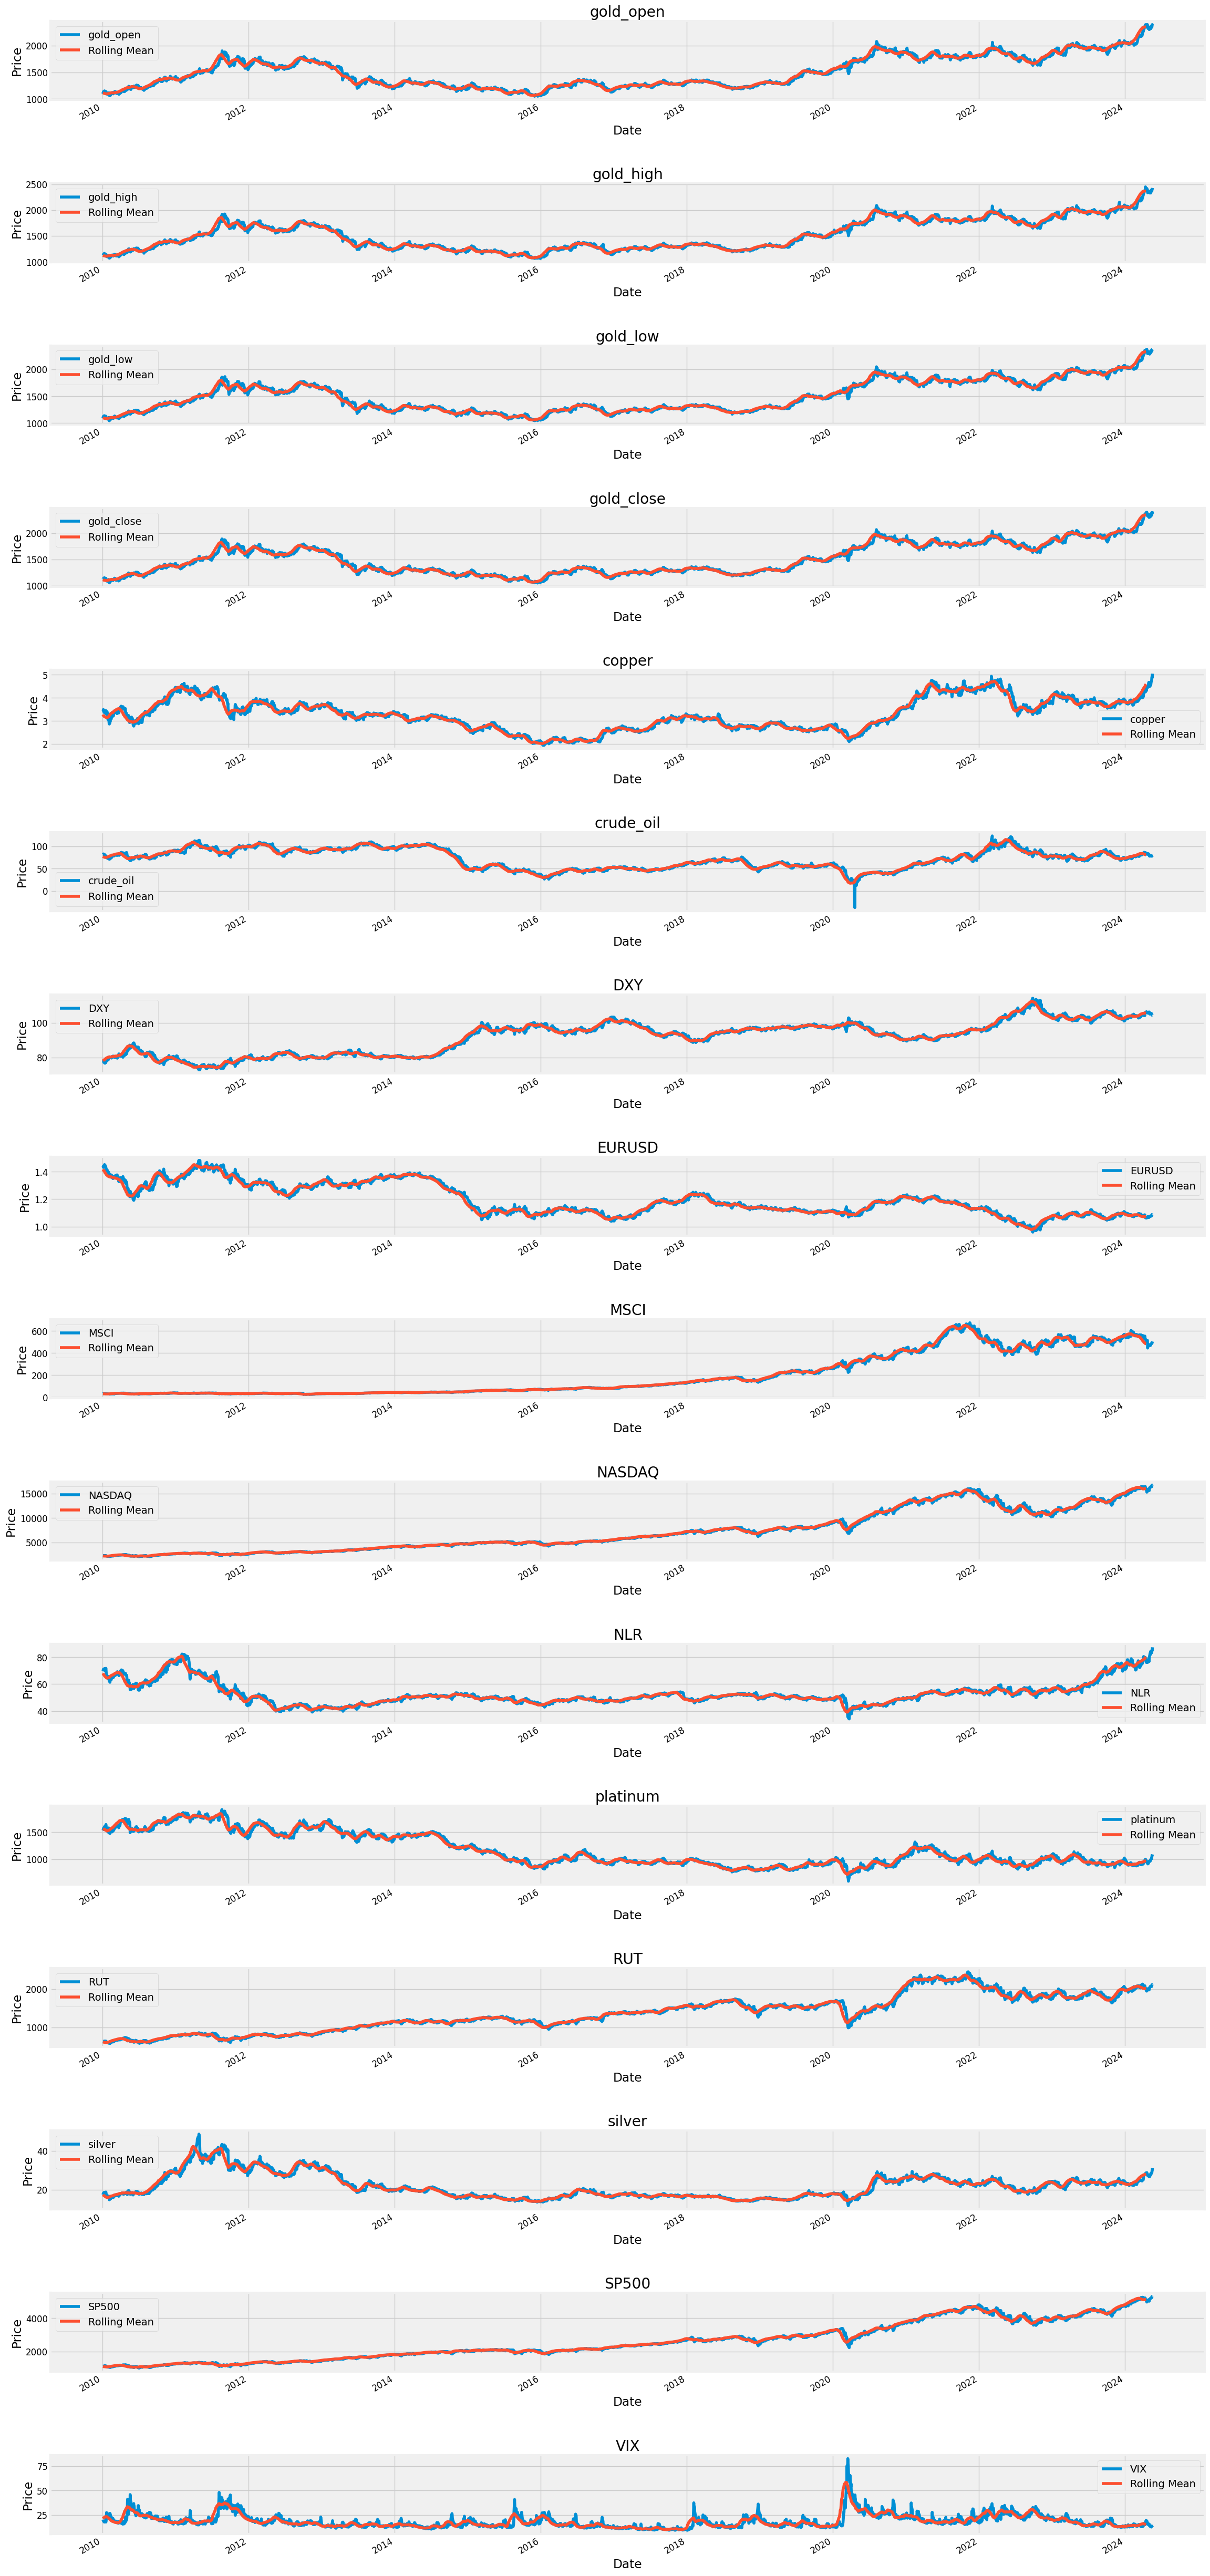

In [14]:
##Line Plots Target & Features
data = df
col_names = data.columns

fig = plt.figure(figsize=(24, 50))
plt.style.use('fivethirtyeight')
for i in range(16):
  ax = fig.add_subplot(16,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(25).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

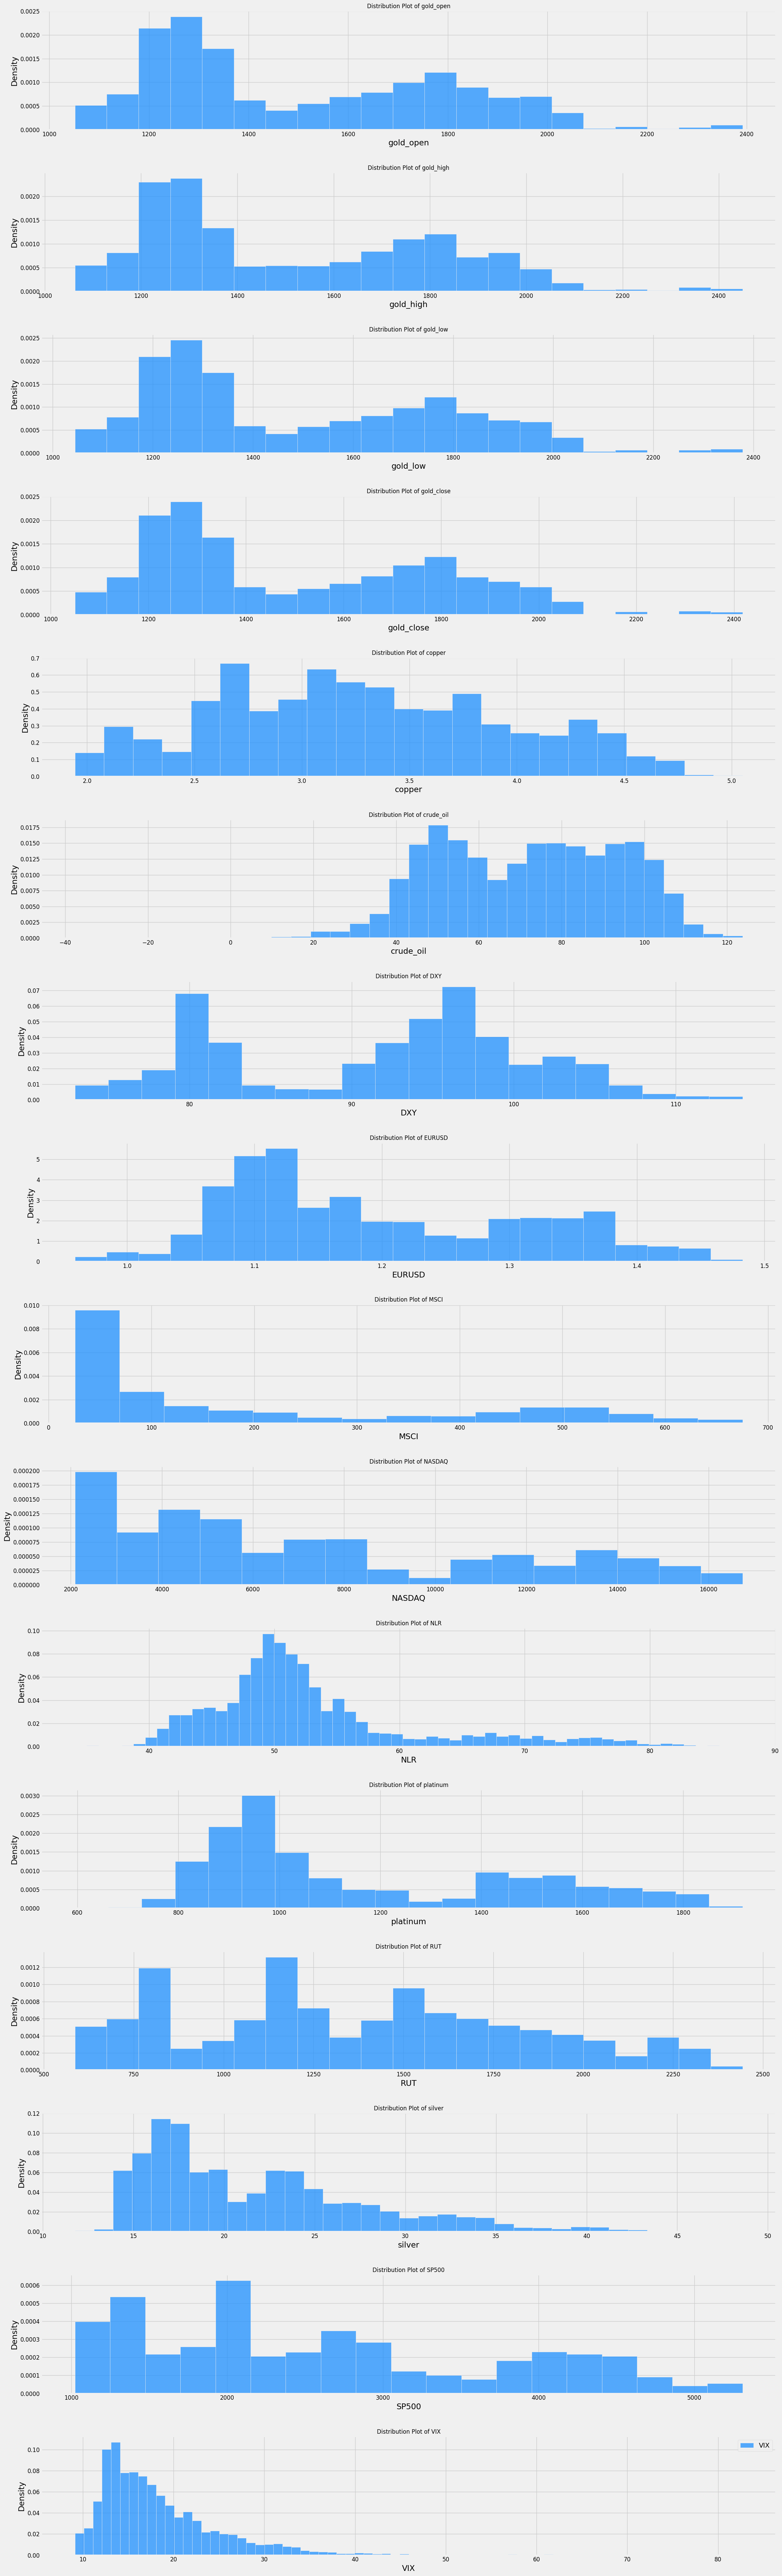

In [18]:
##Checking if Target and Features follow Normal Distribution
data = df
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(24, 80))
plt.style.use('fivethirtyeight')
col_names = data.columns

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data.iloc[:, i], color='dodgerblue', ax=ax, label=col_names[i], stat='density')
    ax.set_title(f"Distribution Plot of {col_names[i]}", fontsize=12)
    ax.tick_params(labelsize=12)

fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.95)  # Thêm dòng này để tránh tiêu đề bị cắt
plt.legend(loc='upper right')  # Thêm vị trí cho legend
plt.show()

Từ các biểu đồ phân phối ở trên :

-> Khoảng giá trị phổ biến nhất của giá vàng thường là từ 1200 đến 1300.

-> Các giá trị của giá vàng thường ít khi trên 2400.

-> Tất cả các đặc trưng đều không tuân theo đinh luật phân phối chuẩn.

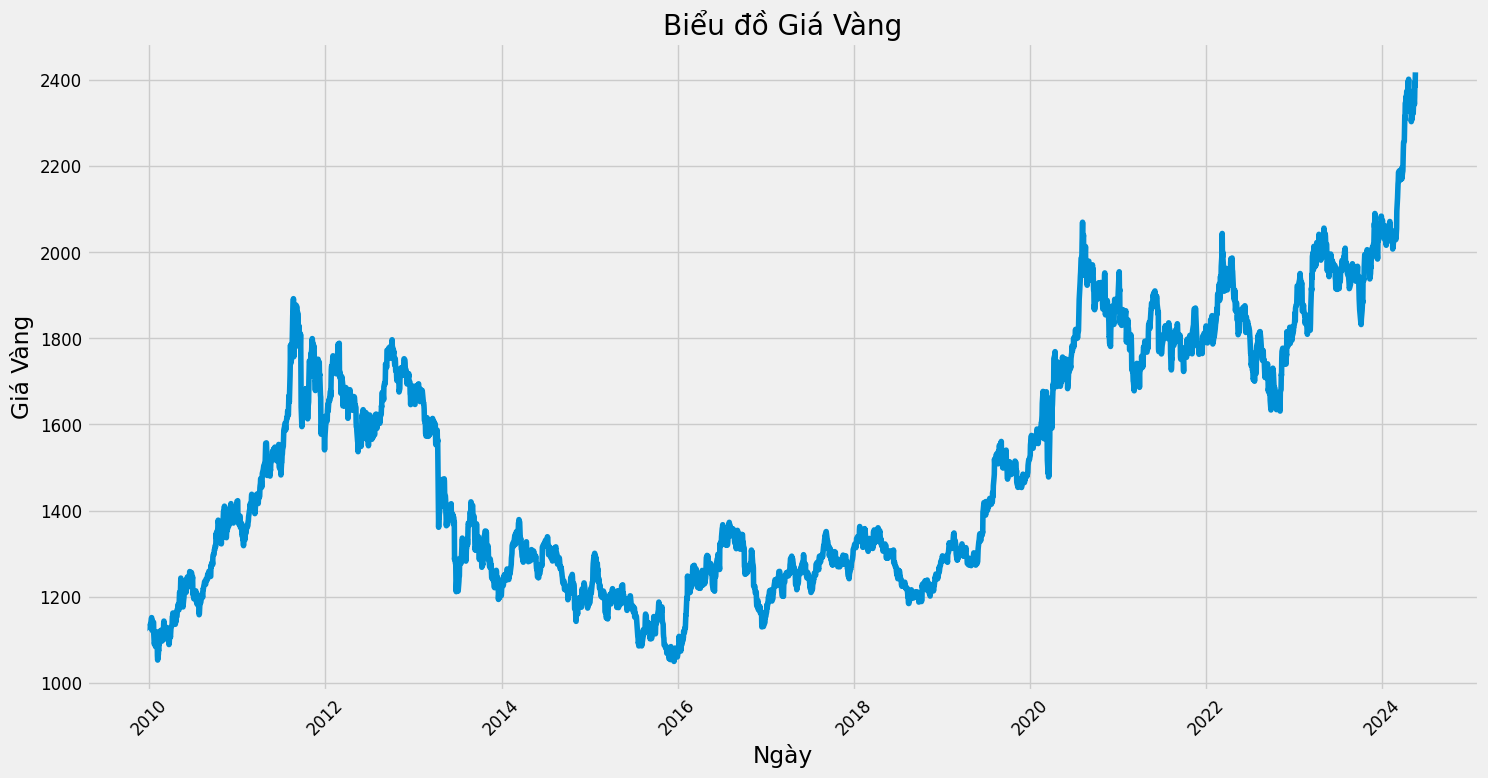

In [21]:
#Plotting Gold Closeing Prices

data = pd.read_csv('D:\Gold-price-prediction\ML_Project\ML_Project\data\saved\merged_data.csv')

# Lấy dữ liệu của cột 'gold_close'
gold_close = data['gold_close']

# Lấy dữ liệu của cột 'Date'
dates = pd.to_datetime(data['Date'])

# Vẽ biểu đồ dữ liệu toàn thời gian
plt.figure(figsize=(16, 8))  # Đặt kích thước của biểu đồ
plt.plot(dates, gold_close)
plt.title('Biểu đồ Giá Vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá Vàng')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.show()

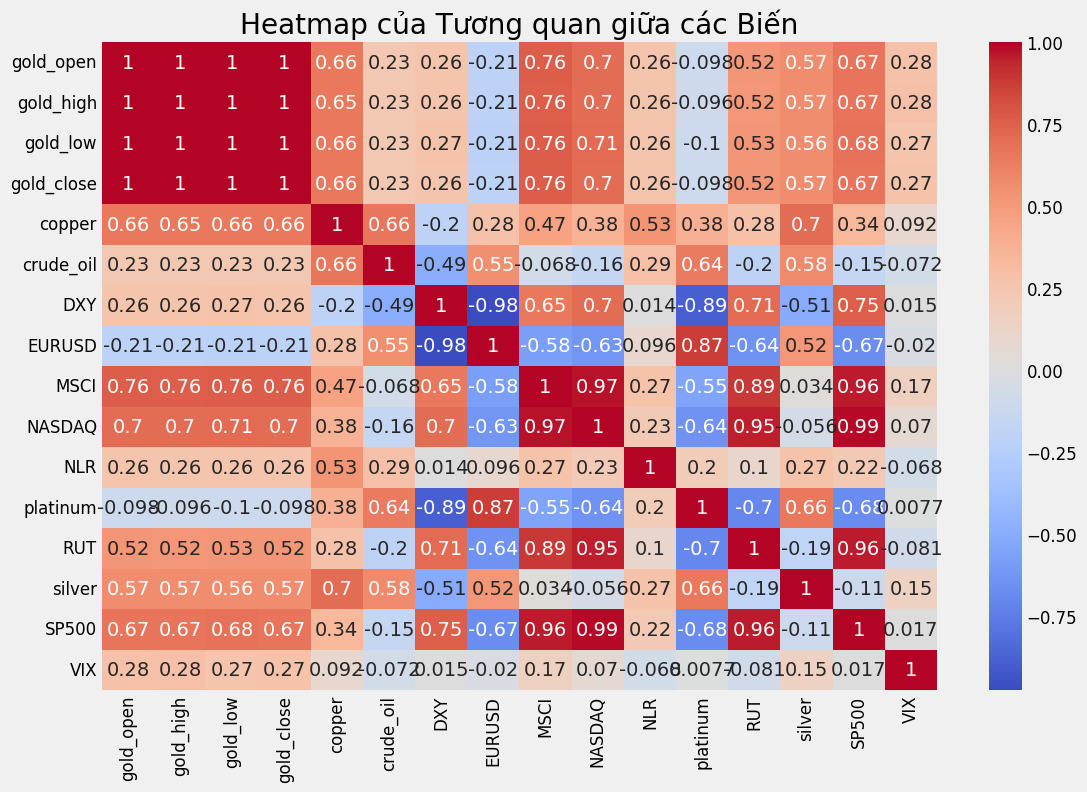

Ma trận Tương quan:
            gold_open  gold_high  gold_low  gold_close    copper  crude_oil  \
gold_open    1.000000   0.999440  0.999216    0.998776  0.655959   0.233680   
gold_high    0.999440   1.000000  0.999035    0.999364  0.654669   0.232826   
gold_low     0.999216   0.999035  1.000000    0.999500  0.657194   0.233204   
gold_close   0.998776   0.999364  0.999500    1.000000  0.656564   0.233225   
copper       0.655959   0.654669  0.657194    0.656564  1.000000   0.663397   
crude_oil    0.233680   0.232826  0.233204    0.233225  0.663397   1.000000   
DXY          0.264350   0.262132  0.268837    0.264354 -0.202326  -0.494303   
EURUSD      -0.209404  -0.207186 -0.213555   -0.209336  0.275291   0.552360   
MSCI         0.761447   0.759444  0.764888    0.761715  0.467116  -0.067737   
NASDAQ       0.703617   0.700922  0.707700    0.703746  0.377893  -0.155499   
NLR          0.259151   0.258257  0.263480    0.261338  0.531006   0.288364   
platinum    -0.098161  -0.095800

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('D:\Gold-price-prediction\ML_Project\ML_Project\data\saved\merged_data.csv')

# Tạo bản sao của dữ liệu, loại bỏ cột 'Date'
data_corr = data.drop('Date', axis=1)

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap của Tương quan giữa các Biến')
plt.show()

# Phân tích tương quan
print('Ma trận Tương quan:')
print(correlation_matrix)

# Đưa ra kết luận
print('\nKết luận:')
print('Các cặp biến có tương quan cao (> 0.7 hoặc < -0.7):')
high_corr_vars = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_vars = high_corr_vars[high_corr_vars > 0.7]
print(high_corr_vars[lambda x: x.index.get_level_values(0) != x.index.get_level_values(1)])